## Script de extração das tabelas do relatório da IOPC

In [1]:
import os
import pandas as pd
import numpy as np
import camelot
import matplotlib.pyplot as plt
import matplotlib

In [2]:
pdf_path = 'docs/iopc_tables.pdf'
tabelas = camelot.read_pdf(pdf_path, flavor="stream", pages="all")

In [3]:
print(f"Número de tabelas detectadas: {tabelas.n}")

Número de tabelas detectadas: 13


In [4]:
print(tabelas[0].parsing_report)

{'accuracy': 99.57, 'whitespace': 52.5, 'order': 1, 'page': 1}


C:\Users\PEDRO\AppData\Local\Temp\ipykernel_15676\2571834328.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tabelas[0], kind='text').show()


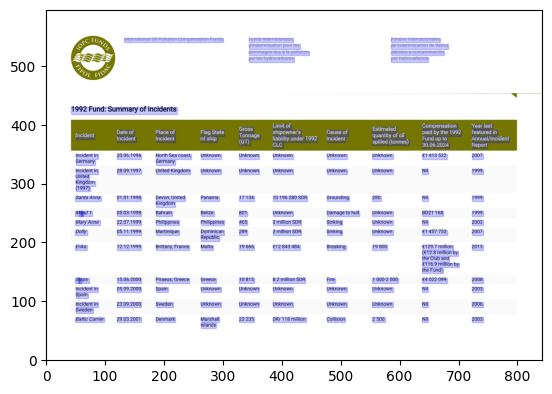

In [5]:
# Conferindo o texto capturado na primeira página
camelot.plot(tabelas[0], kind='text').show()

In [6]:
tabelas = [table.df for table in tabelas]

In [7]:
# Divindo em 1992 e 1971 por conta das formatações distintas
tabelas_1992 = tabelas[0:5]
tabelas_1971 = tabelas[5:]

In [8]:
tabelas_1992[0].head(10)

,0,1,2,3,4,5,6,7,8,9
0,1992 Fund: Summary of incidents,,,,,,,,,
1,,,,,,Limit of,,,Compensation,Year last
2,,,,,Gross,,,Estimated,,
3,,Date of,Place of,Flag State,,shipowner’s,Cause of,,paid by the 1992,featured in
4,Incident,,,,Tonnage,,,quantity of oil,,
5,,Incident,Incident,of ship,,liability under 1992,incident,,Fund up to,Annual/Incident
6,,,,,(GT),,,spilled (tonnes),,
7,,,,,,CLC,,,30.06.2024,Report
8,Incident in,20.06.1996,"North Sea coast,",Unknown,Unknown,Unknown,Unknown,Unknown,€1 413 522,2007
9,Germany,,Germany,,,,,,,


In [9]:
tabelas_1971[0].head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1971 Fund: Summary of incidents,,,,,,,,,,
1,,,,,,,,Estimated,,,
2,,,,,,,,,Compensation,,Year last
3,,,,,Gross,Limit of,,quantity,,Indemnification,
4,,Date of,Place of,Flag State,,,Cause of,,paid by the,,featured in
5,Incident,,,,Tonnage,shipowner’s liability,,of oil,,paid by the,
6,,Incident,Incident,of ship,,,incident,,1971 Fund up,,Annual/Incident
7,,,,,(GT),under 1992 CLC,,spilled,,1971 Fund,
8,,,,,,,,,to 31.12.14,,Report
9,,,,,,,,(tonnes),,,


In [10]:
# Tabelas de índice 0 estão com textos fora das tabelas principais
tabelas_1992[0] = tabelas_1992[0].iloc[1:].reset_index(drop=True)
tabelas_1971[0] = tabelas_1971[0].iloc[1:].reset_index(drop=True)

In [11]:
columns_1992 = []
columns_1971 = []

# Capturando colunas de 1992
for j in range(10):
    nome_coluna = ""
    for i in range(7):
        if tabelas_1992[0].iloc[i,j] != "":
            nome_coluna += " " + tabelas_1992[0].iloc[i,j]
    columns_1992.append(nome_coluna.strip())

# Capturando colunas de 1971
for j in range(11):
    nome_coluna = ""
    for i in range(7):
        if tabelas_1971[0].iloc[i,j] != "":
            nome_coluna += " " + tabelas_1971[0].iloc[i,j]
    columns_1971.append(nome_coluna.strip())

print(columns_1992)
print(columns_1971)

['Incident', 'Date of Incident', 'Place of Incident', 'Flag State of ship', 'Gross Tonnage (GT)', 'Limit of shipowner’s liability under 1992 CLC', 'Cause of incident', 'Estimated quantity of oil spilled (tonnes)', 'Compensation paid by the 1992 Fund up to 30.06.2024', 'Year last featured in Annual/Incident Report']
['Incident', 'Date of Incident', 'Place of Incident', 'Flag State of ship', 'Gross Tonnage (GT)', 'Limit of shipowner’s liability under 1992 CLC', 'Cause of incident', 'Estimated quantity of oil spilled', 'Compensation paid by the 1971 Fund up', 'Indemnification paid by the 1971 Fund', 'Year last featured in Annual/Incident']


In [12]:
import pandas as pd

# Redefinindo as colunas do DataFrame e concatenando as tabelas
tabelas_1992_concat = []
for tabela in tabelas_1992[0:4]:
    tabela.columns = columns_1992
    tabela = tabela.iloc[7:].reset_index(drop=True)
    tabelas_1992_concat.append(tabela)

# Concatenando todas as tabelas de 1992 em um único DataFrame
df_1992 = pd.concat(tabelas_1992_concat, ignore_index=True)

tabelas_1971_concat = []
for tabela in tabelas_1971:
    tabela.columns = columns_1971
    tabela = tabela.iloc[9:].reset_index(drop=True)
    tabelas_1971_concat.append(tabela)

# Concatenando todas as tabelas de 1971 em um único DataFrame
df_1971 = pd.concat(tabelas_1971_concat, ignore_index=True)


In [13]:
df_1992

,Incident,Date of Incident,Place of Incident,Flag State of ship,Gross Tonnage (GT),Limit of shipowner’s liability under 1992 CLC,Cause of incident,Estimated quantity of oil spilled (tonnes),Compensation paid by the 1992 Fund up to 30.06.2024,Year last featured in Annual/Incident Report
0,Incident in,20.06.1996,"North Sea coast,",Unknown,Unknown,Unknown,Unknown,Unknown,€1 413 522,2007
1,Germany,,Germany,,,,,,,
2,Incident in,28.09.1997,United Kingdom,Unknown,Unknown,Unknown,Unknown,Unknown,Nil,1999
3,United,,,,,,,,,
4,Kingdom,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
93,Trident Star,24.08.2016,Malaysia,Malaysia,3 177,SDR 4.51 million,Unknown,Unconfirmed,USD 3 700 000,2022
94,,,,,,,,,(reimbursed under,
95,,,,,,,,,STOPIA 2006),
96,Nathan E.,13.10.2016,Canada,United States,ATB unit,,,110 000 litres of,Nil,
